PROCESAMIENTO DE IMÁGENES

NOMBRE: MICHAEL COLCHA

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap = cv.VideoCapture(1)

## HSV azul
azul_bajo = np.array([90,100,50], np.uint8)
azul_alto = np.array([125,255,255], np.uint8)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        img_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        mask = cv.inRange(img_hsv, azul_bajo, azul_alto)
        res = cv.bitwise_and(frame, frame, mask=mask)
        cv.imshow("ORIGINAL", frame)
        cv.imshow("MÁSCARA", mask)
        cv.imshow("RESULTADO", res)
        if cv.waitKey(10) & 0xFF == ord("q"):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()

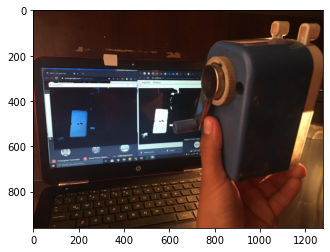

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# Cargar imagen
img = cv.imread("Pic/color.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

TRANSFORMACIONES GEOMÉTRICAS CON IMÁGENES

ESCALADO

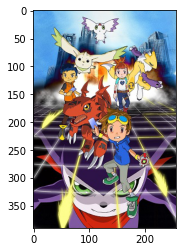

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("Pic/tamers.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

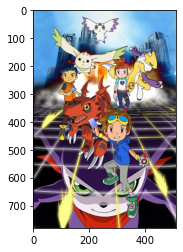

In [6]:
# Escalado
img_escal = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
plt.imshow(img_escal)

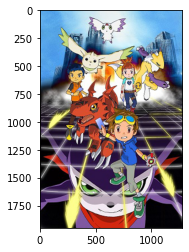

In [7]:
h,w,_ = img.shape
result = cv.resize(img, (w*5,h*5), interpolation=cv.INTER_CUBIC)
plt.imshow(result)

ROTACIÓN

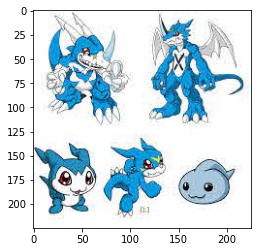

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("Pic/vee.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

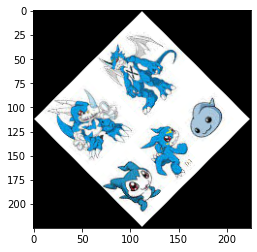

In [10]:
# Girar la imagen
fil,col,_ = img.shape
# Matriz de rotación
m = cv.getRotationMatrix2D(((col-1)/2.0,(fil-1)/2.0),45,0.7)
# Transformación de la imagen
result = cv.warpAffine(img, m, (col, fil))
plt.imshow(result)

TRASLACIÓN

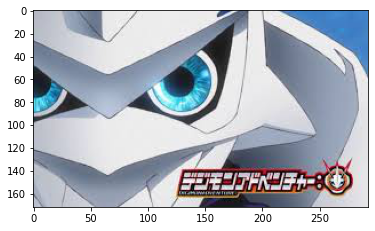

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv. imread("Pic/omega.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

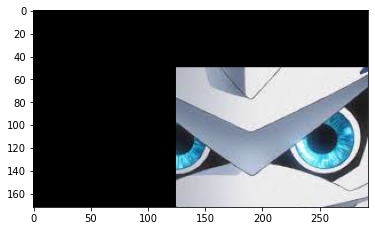

In [15]:
# Traslación
fil,col,_ = img.shape
M = np.float32([[1,0,125],[0,1,50]])
result = cv.warpAffine(img, M, (col, fil))
plt.imshow(result)

TRANSFORMACIÓN AFIN

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

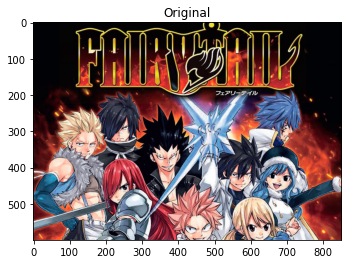

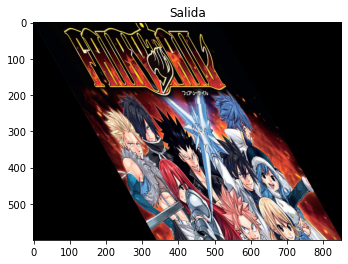

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("Pic/fairy.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(img), plt.title("Original")
fil,col,_ =img.shape

# Puntos de entrada
scr_points = np.float32([[0,0], [col-1,0], [0,fil-1]])

#Puntos de salida
dts_points = np.float32([[0,0] , [int(0.6*(col-1)),0] , [int(0.4*(col-1)),fil-1]])

# Matriz de transformación Afin
matris_Afin = cv.getAffineTransform(scr_points,dts_points)

# Transformación
output = cv.warpAffine(img,matris_Afin,(col,fil))

# Salida
plt.figure(2), plt.imshow(output), plt.title("Salida")

ESPEJO

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

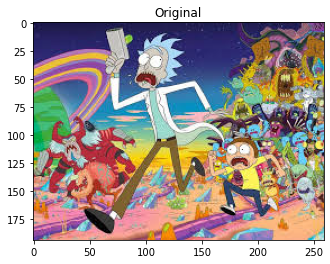

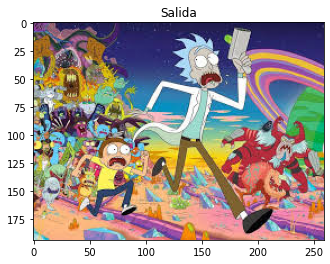

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("Pic/rick.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(1)
plt.imshow(img), plt.title("Original")
fil,col,_ =img.shape

# Puntos de entrada
scr_points = np.float32([[0,0], [col-1,0], [0,fil-1]])

# Puntos de salida
dts_points = np.float32([[col-1,0], [0,0],[col-1, fil-1]])

# Matriz de transformacion Afin
matris_Afin = cv.getAffineTransform(scr_points,dts_points)

# Transformación
output = cv.warpAffine(img,matris_Afin,(col,fil))

# Salida
plt.figure(2), plt.imshow(output), plt.title("Salida")

TRANSFORMACIÓN DE PERSPECTIVA

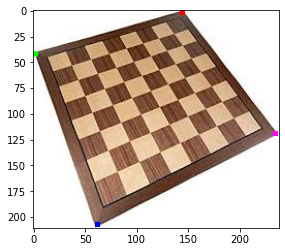

In [21]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("Pic/aje.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Arriba izquierda_verde
img[40:45,0:5]=[0,255,0]

# Arriba derecha_roja
img[0:5,142:147]=[255,0,0]

# Abajo izquierda_azul
img[205:210,60:65]=[0,0,255]

# Arriba derecha_morado
img[117:122,232:237]=[255,0,255]
plt.imshow(img)

(<matplotlib.image.AxesImage at 0x28930b84c50>, Text(0.5, 1.0, 'OUTPUT'))

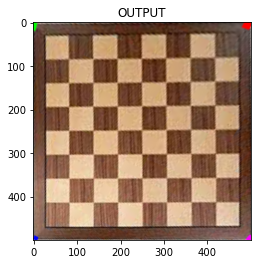

In [27]:
pts1 = np.float32([[1,40],[60,210],[145,1],[235,120]])
pts2 = np.float32([[0,0],[0,500-1],[500-1,0],[500-1,500-1]])
matris = cv.getPerspectiveTransform(pts1,pts2)
output = cv.warpPerspective(img, matris,(500,500))
plt.imshow(output),plt.title("OUTPUT")